In [1]:
from reservoir import ESN

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
esn = ESN()

In [5]:
# setting random initial conditions 
#esn.x=1e-5*np.random.normal(size=esn.x.shape)

In [6]:
t_train = 5000
tvec=np.array(list(range(t_train)))
ftarget=np.cos(tvec/40.0)

In [7]:
#open loop with win=wfb for simplified training
esn.win = esn.wfb
esn.wout = 0*esn.wout

In [8]:
rec = []
recx = []
recz = []
for ii in range(t_train):
    esn.step(uin=ftarget[ii])
    rec.append(esn.r.reshape([-1]))
    recx.append(esn.x.reshape([-1]))
    recz.append(esn.z.reshape([-1]))

<IPython.core.display.Javascript object>


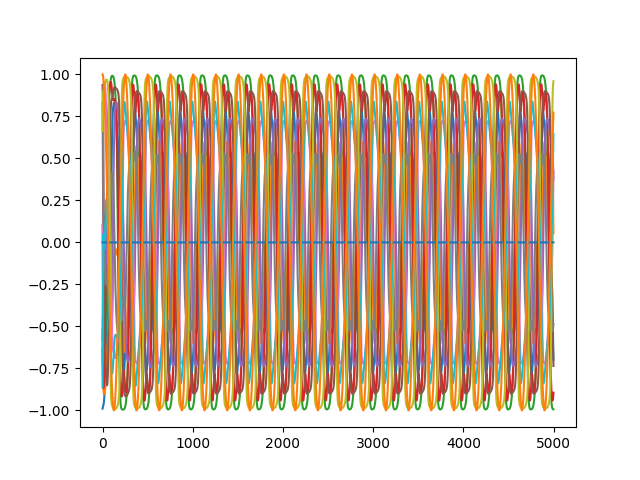

In [9]:
plt.figure()
plt.plot(((np.array(rec)[:,0:10])))
plt.plot(recz,'-')
plt.plot(ftarget)

In [10]:
#batch training by linear regression
R=np.array(rec)
esn.wout =  np.matmul(ftarget,np.matmul(np.linalg.inv(np.matmul(R,R.transpose())+np.eye(t_train,t_train)),R))

In [11]:
# now testing
rec = []
recx = []
recz = []
for ii in range(10000):
    esn.step(uin=np.array([0])) #now input is zero and pattern shoould regenerate autonomously
    rec.append(esn.r.reshape([-1]))
    recx.append(esn.x.reshape([-1]))
    recz.append(esn.z.reshape([-1]))


<IPython.core.display.Javascript object>


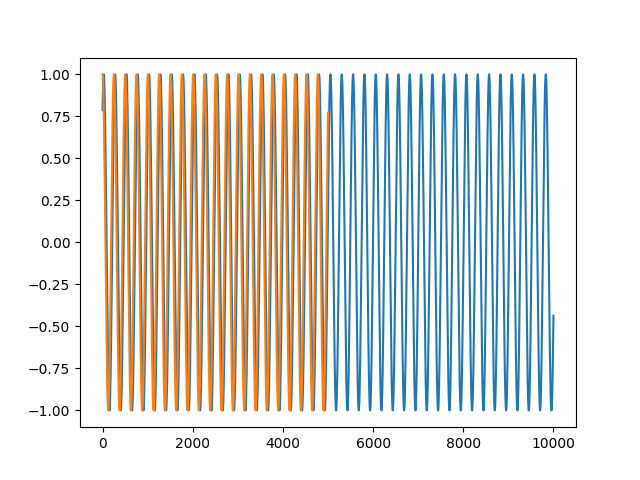

<IPython.core.display.Javascript object>


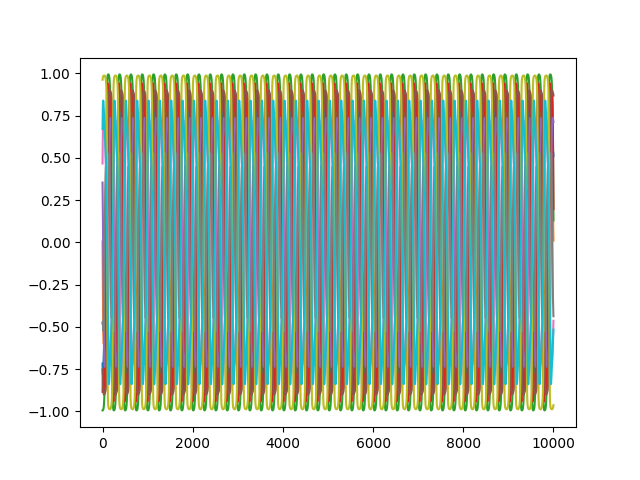

In [12]:
#repeating the plots
plt.figure()
plt.plot(recz,'-')
plt.plot(ftarget)
plt.figure()
plt.plot(((np.array(rec)[:,0:10])))
